In [84]:
pip install keras


In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
#importing the required libraries

In [86]:
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense,Input,Dropout,Conv2D,MaxPooling2D,Flatten


Q1) Understanding the Dataset and pre-processing

In [87]:
data=tf.keras.datasets.fashion_mnist

In [88]:
#Reading The Dataset
(x_train,y_train),(x_test,y_test)=data.load_data()

Displaying the Number of classes

In [89]:
#To find the no of Labels for the dataset using Y_train
num_classes = len(np.unique(y_train))


In [90]:
print ("Number of Classes:",num_classes)

Number of Classes: 10


In [91]:
y=x_train.shape
y[0]


60000

Dimension of the image

In [92]:
img_height, img_width = x_train.shape[1], x_train.shape[2]
print("Image dimensions:", img_width, "x", img_height)

Image dimensions: 28 x 28


Displaying one image from each class

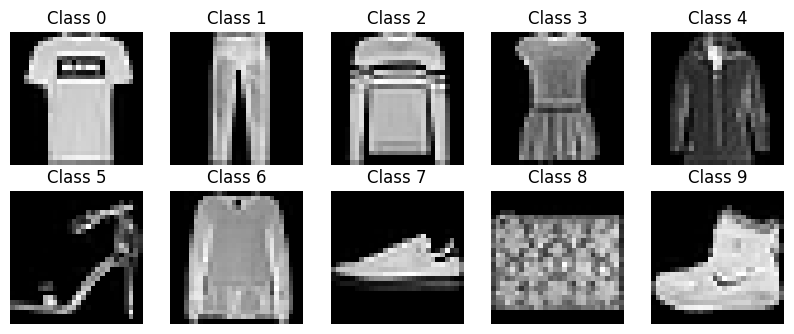

In [93]:
plt.figure(figsize=(10, 10))
for class_label  in range (num_classes):
    plt.subplot(5, 5, class_label + 1)
    plt.imshow(x_train[np.argmax(y_train == class_label)], cmap='gray')
    plt.title(f"Class {class_label}")
    plt.axis('off')
plt.show()

Performing Normalisation

In [94]:
x_train=x_train/255.0
x_test=x_test/255.0

Creation of FCNN model

In [95]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"))
model.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"))
model.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"))
model.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))


In [96]:
model.summary()#Summary of the Model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
#we can use different types of optimizers like adam,...etc here i have used adamax
#For loss i have used sparse categorical is most commonly used for classification and also extension for the cross entropy(Binary)



In [98]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,batch_size=16)

Epoch 1/20
3375/3375 [==============================] - 13s 4ms/step - loss: 0.4996 - accuracy: 0.8261 - val_loss: 0.4274 - val_accuracy: 0.8397
Epoch 2/20
3375/3375 [==============================] - 15s 4ms/step - loss: 0.3746 - accuracy: 0.8653 - val_loss: 0.3492 - val_accuracy: 0.8702
Epoch 3/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.3348 - accuracy: 0.8782 - val_loss: 0.3602 - val_accuracy: 0.8678
Epoch 4/20
3375/3375 [==============================] - 12s 3ms/step - loss: 0.3111 - accuracy: 0.8858 - val_loss: 0.3297 - val_accuracy: 0.8788
Epoch 5/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.2902 - accuracy: 0.8940 - val_loss: 0.3324 - val_accuracy: 0.8757
Epoch 6/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.2747 - accuracy: 0.8991 - val_loss: 0.3199 - val_accuracy: 0.8880
Epoch 7/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.2616 - accuracy: 0.9036 - val_loss: 0.3166 - val_ac

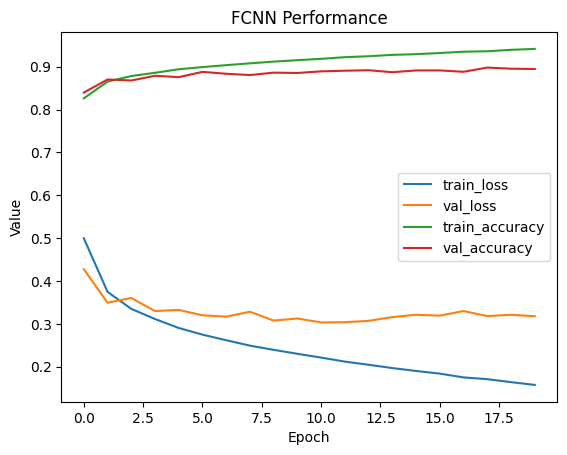

In [99]:
# Plot performance curves for Fully connected neural network
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('FCNN Performance')
plt.show()

In [100]:
y_predicted = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.11835260e-08, 1.29991362e-09, 1.20649002e-08, 6.02243366e-09,
       1.24593775e-08, 4.02709884e-06, 1.92272000e-06, 2.20884744e-04,
       2.41993146e-08, 9.99773085e-01], dtype=float32)

In [101]:
np.argmax(y_predicted[0])

9

In [102]:
np.argmax(y_predicted[1])

2

In [103]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

Construction of confusion matrix

In [104]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[867,   2,  21,  10,   6,   2,  82,   0,  10,   0],
       [  3, 973,   1,  16,   4,   0,   2,   0,   1,   0],
       [ 17,   1, 849,  12,  86,   0,  32,   0,   3,   0],
       [ 33,   5,  13, 874,  49,   0,  22,   0,   4,   0],
       [  2,   0, 102,  19, 848,   0,  25,   0,   4,   0],
       [  0,   0,   0,   1,   0, 969,   0,  17,   1,  12],
       [118,   1, 114,  26,  88,   0, 641,   0,  12,   0],
       [  0,   0,   0,   0,   0,  16,   0, 963,   1,  20],
       [  7,   0,   2,   5,   1,   2,   2,   3, 978,   0],
       [  0,   0,   0,   0,   0,   6,   1,  30,   0, 963]], dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

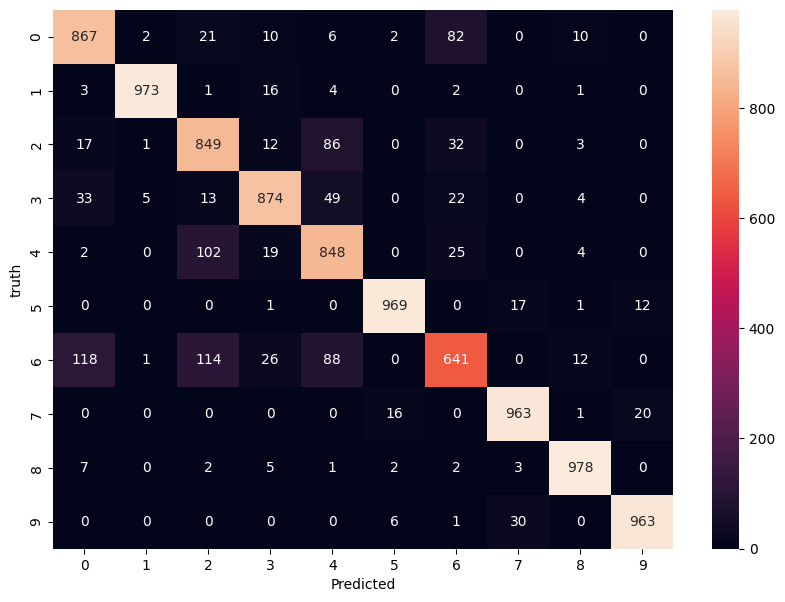

In [105]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot =True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

Creation of CNN Model

In [106]:
#Building the CNN-1 Model with a filter size of 5
model_cnn1=Sequential()
model_cnn1.add(Input(shape=(28,28,1)))
model_cnn1.add(Conv2D(32,kernel_size=(5,5),activation="relu",padding="valid"))
model_cnn1.add(MaxPooling2D(pool_size=(2,2),strides=2))
#classification and Flattening
model_cnn1.add(Flatten())
model_cnn1.add(Dense(100,activation="relu"))
model_cnn1.add(Dense(10,activation="softmax"))


In [107]:
#created a cnn model with a filter 5*5
model_cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               460900    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [108]:
#Builfing the CNN-2 Model
model_cnn2=Sequential()
model_cnn2.add(Input(shape=(28,28,1)))
model_cnn2.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model_cnn2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_cnn2.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model_cnn2.add(MaxPooling2D(pool_size=(2,2),strides=2))
#classification part
model_cnn2.add(Flatten())
model_cnn2.add(Dense(100,activation="relu"))
model_cnn2.add(Dense(10,activation="softmax"))

In [109]:
#created a cnn model with a filter 3*3
model_cnn2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [110]:
optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0025)


In [111]:
model_cnn1.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer1,metrics=["accuracy"])


In [112]:
history1=model_cnn1.fit(x_train,y_train,batch_size=250,epochs=30,validation_split=0.1)

Epoch 1/30
216/216 [==============================] - 2s 5ms/step - loss: 0.4776 - accuracy: 0.8317 - val_loss: 0.3318 - val_accuracy: 0.8840
Epoch 2/30
216/216 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8878 - val_loss: 0.2957 - val_accuracy: 0.8925
Epoch 3/30
216/216 [==============================] - 1s 4ms/step - loss: 0.2697 - accuracy: 0.9029 - val_loss: 0.2907 - val_accuracy: 0.8952
Epoch 4/30
216/216 [==============================] - 1s 4ms/step - loss: 0.2379 - accuracy: 0.9126 - val_loss: 0.2831 - val_accuracy: 0.9012
Epoch 5/30
216/216 [==============================] - 1s 5ms/step - loss: 0.2141 - accuracy: 0.9211 - val_loss: 0.2645 - val_accuracy: 0.9057
Epoch 6/30
216/216 [==============================] - 1s 5ms/step - loss: 0.1954 - accuracy: 0.9287 - val_loss: 0.2565 - val_accuracy: 0.9083
Epoch 7/30
216/216 [==============================] - 1s 4ms/step - loss: 0.1765 - accuracy: 0.9343 - val_loss: 0.2582 - val_accuracy: 0.9088
Epoch 

In [113]:
y_predicted = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.11835260e-08, 1.29991362e-09, 1.20649002e-08, 6.02243366e-09,
       1.24593775e-08, 4.02709884e-06, 1.92272000e-06, 2.20884744e-04,
       2.41993146e-08, 9.99773085e-01], dtype=float32)

In [114]:
np.argmax(y_predicted[0])

9

In [115]:
np.argmax(y_predicted[1])

2

In [116]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [117]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[867,   2,  21,  10,   6,   2,  82,   0,  10,   0],
       [  3, 973,   1,  16,   4,   0,   2,   0,   1,   0],
       [ 17,   1, 849,  12,  86,   0,  32,   0,   3,   0],
       [ 33,   5,  13, 874,  49,   0,  22,   0,   4,   0],
       [  2,   0, 102,  19, 848,   0,  25,   0,   4,   0],
       [  0,   0,   0,   1,   0, 969,   0,  17,   1,  12],
       [118,   1, 114,  26,  88,   0, 641,   0,  12,   0],
       [  0,   0,   0,   0,   0,  16,   0, 963,   1,  20],
       [  7,   0,   2,   5,   1,   2,   2,   3, 978,   0],
       [  0,   0,   0,   0,   0,   6,   1,  30,   0, 963]], dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

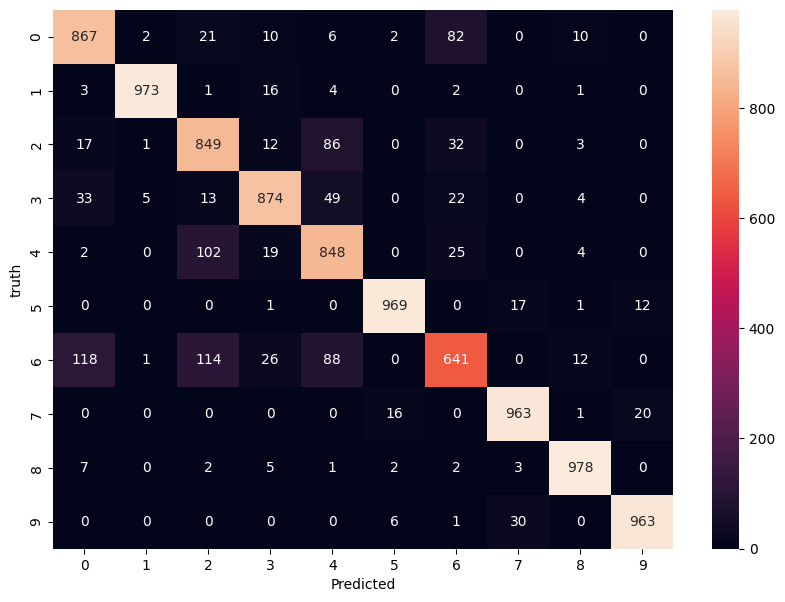

In [118]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot =True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

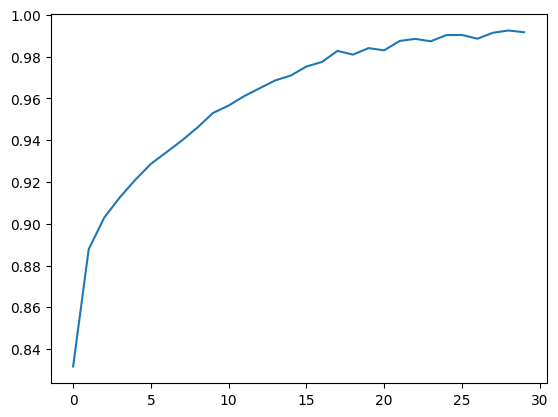

In [119]:
plt.plot(history1.history['accuracy'])

In [120]:
optimizer2=tf.keras.optimizers.Adam(learning_rate=0.0025)

In [121]:
model_cnn2.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer2,metrics=["accuracy"])


In [122]:
history2=model_cnn2.fit(x_train,y_train,batch_size=250,epochs=30,validation_split=0.15)

Epoch 1/30
204/204 [==============================] - 3s 6ms/step - loss: 0.5971 - accuracy: 0.7853 - val_loss: 0.4298 - val_accuracy: 0.8457
Epoch 2/30
204/204 [==============================] - 1s 5ms/step - loss: 0.3679 - accuracy: 0.8678 - val_loss: 0.3415 - val_accuracy: 0.8778
Epoch 3/30
204/204 [==============================] - 1s 5ms/step - loss: 0.3229 - accuracy: 0.8822 - val_loss: 0.3387 - val_accuracy: 0.8778
Epoch 4/30
204/204 [==============================] - 1s 5ms/step - loss: 0.2914 - accuracy: 0.8943 - val_loss: 0.3041 - val_accuracy: 0.8890
Epoch 5/30
204/204 [==============================] - 1s 5ms/step - loss: 0.2712 - accuracy: 0.9015 - val_loss: 0.2858 - val_accuracy: 0.8953
Epoch 6/30
204/204 [==============================] - 1s 5ms/step - loss: 0.2492 - accuracy: 0.9087 - val_loss: 0.2772 - val_accuracy: 0.8972
Epoch 7/30
204/204 [==============================] - 1s 6ms/step - loss: 0.2368 - accuracy: 0.9132 - val_loss: 0.2604 - val_accuracy: 0.9033
Epoch 

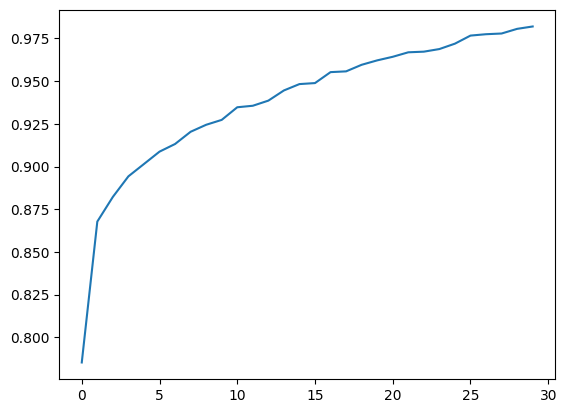

In [123]:
plt.plot(history2.history['accuracy'])

In [124]:
loss1,accuracy=model_cnn1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6176 - accuracy: 0.9040


In [125]:
loss2,accuracy=model_cnn2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.9066


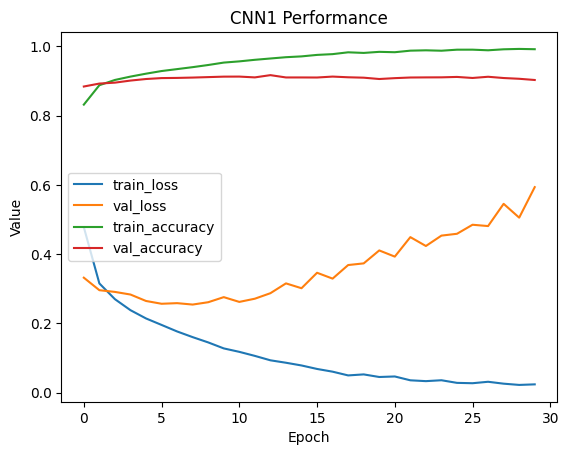

In [126]:
plt.plot(history1.history['loss'], label='train_loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['accuracy'], label='train_accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('CNN1 Performance')
plt.show()

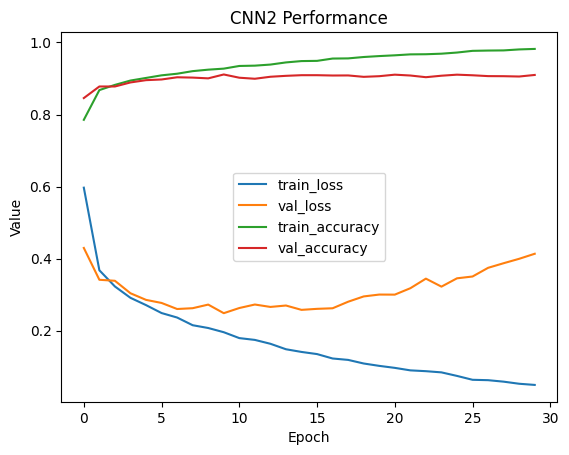

In [127]:
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('CNN2 Performance')
plt.show()

Comparsion of Performances Between Fully connected neural network and Convolution neural network

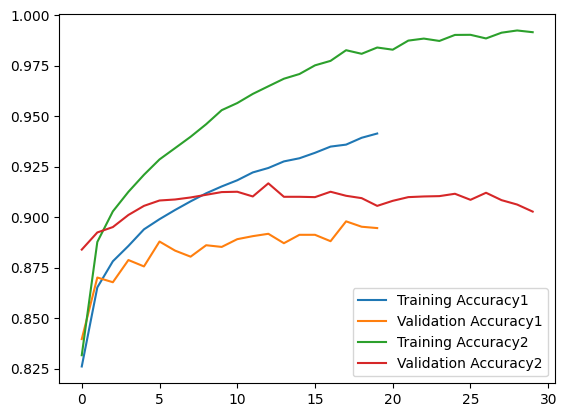

In [128]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn1 = history1.history['accuracy']
validation_accuracy_cnn1 = history1.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn1, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn1, label='Validation Accuracy2')
plt.legend()

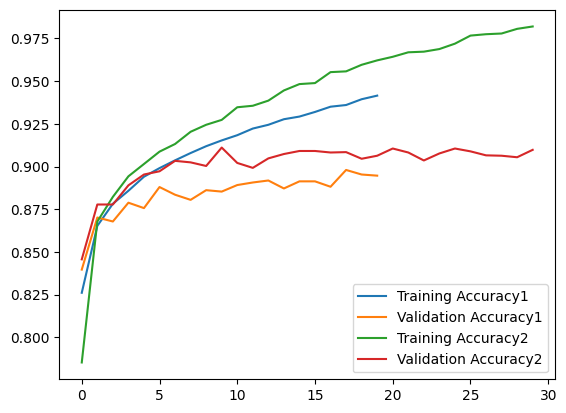

In [129]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn2 = history2.history['accuracy']
validation_accuracy_cnn2 = history2.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn2, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn2, label='Validation Accuracy2')
plt.legend()

In [130]:
#### As we can clearly observe from both the graph plots that both the CNN1 and CNN2 models provide much higher accuracy than the FCNN

In [1]:
## Q5) Compare the number of parameters in the FCNN and the CNN

In [2]:
#### The number of parameters in FCNN are 266610 while the number of parameters in CNN1 and CNN2 are 462742 and 471478 respectively

In [3]:
## Q6) Discuss the computational efficiency of both networks. Which one took longer to train and why?

In [4]:
#### The computational efficiency order is CNN2>CNN1>FCNN. The training accuracy score and the validation accuracy score define the performance of the models and it is clear that CNN2 is better than CNN1 which is better than FCNN.

In [5]:
#### It took longer time to train CNN2 than CNN1 which took more time than FCNN. The reason for that is that CNN2 contained the most number of parameters followed by CNN1 and FCNN. The increased number of parameters resulted in the computation taking more time